In [28]:
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
from src.utils import *
from glob import glob

In [21]:
os.chdir(FOLDER_PROJECT)
df = pd.concat([pd.read_csv(i).drop_duplicates() for i in glob(FOLDER_DB + "/*.csv")], ignore_index=True) 

### Remove all the companies that have NaN names


In [22]:
df = df[df['Company'].notna()]

### Standardize company names

In [23]:
df["Company"] = df["Company"].apply(str.upper)

### Select only the rows after January 1st 2021

In [24]:
df = df[df["Date"] > "20/01/01"]

### Plot and save the distribution for each category

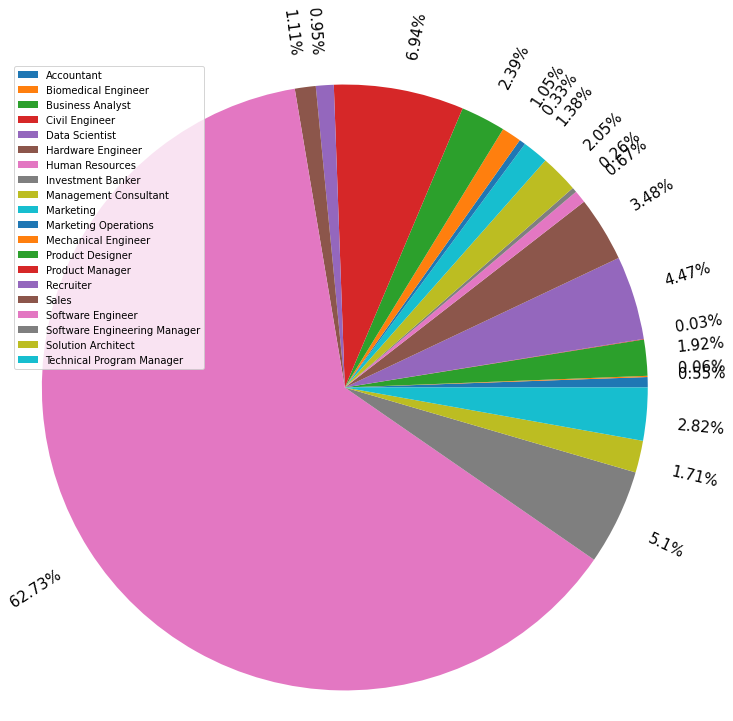

In [27]:
data = df.groupby(["Job"]).size()

per = data.values
job = data.index

fig, ax = plt.subplots()
fig.set_figheight(12)
fig.set_figwidth(12)
patches, _, = ax.pie(per, labels=[f"{round(a,2)}%" for a in (per/sum(per)*100)], autopct=None, rotatelabels=True, radius=3, textprops={"size":15})
plt.legend(patches, job, loc="best")
ax.axis('equal');
#fig.savefig(os.path.join(FOLDER_RES, "pie_chart_percentages.png"))

## Continue...
